# Data Preparation


#### Importing Libs and Loading Data

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

house_data = pd.read_csv("../data/raw/kc_house_data.csv")

#### Data Cleaning

##### Handling missing data

In [16]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##### Outlier Handling

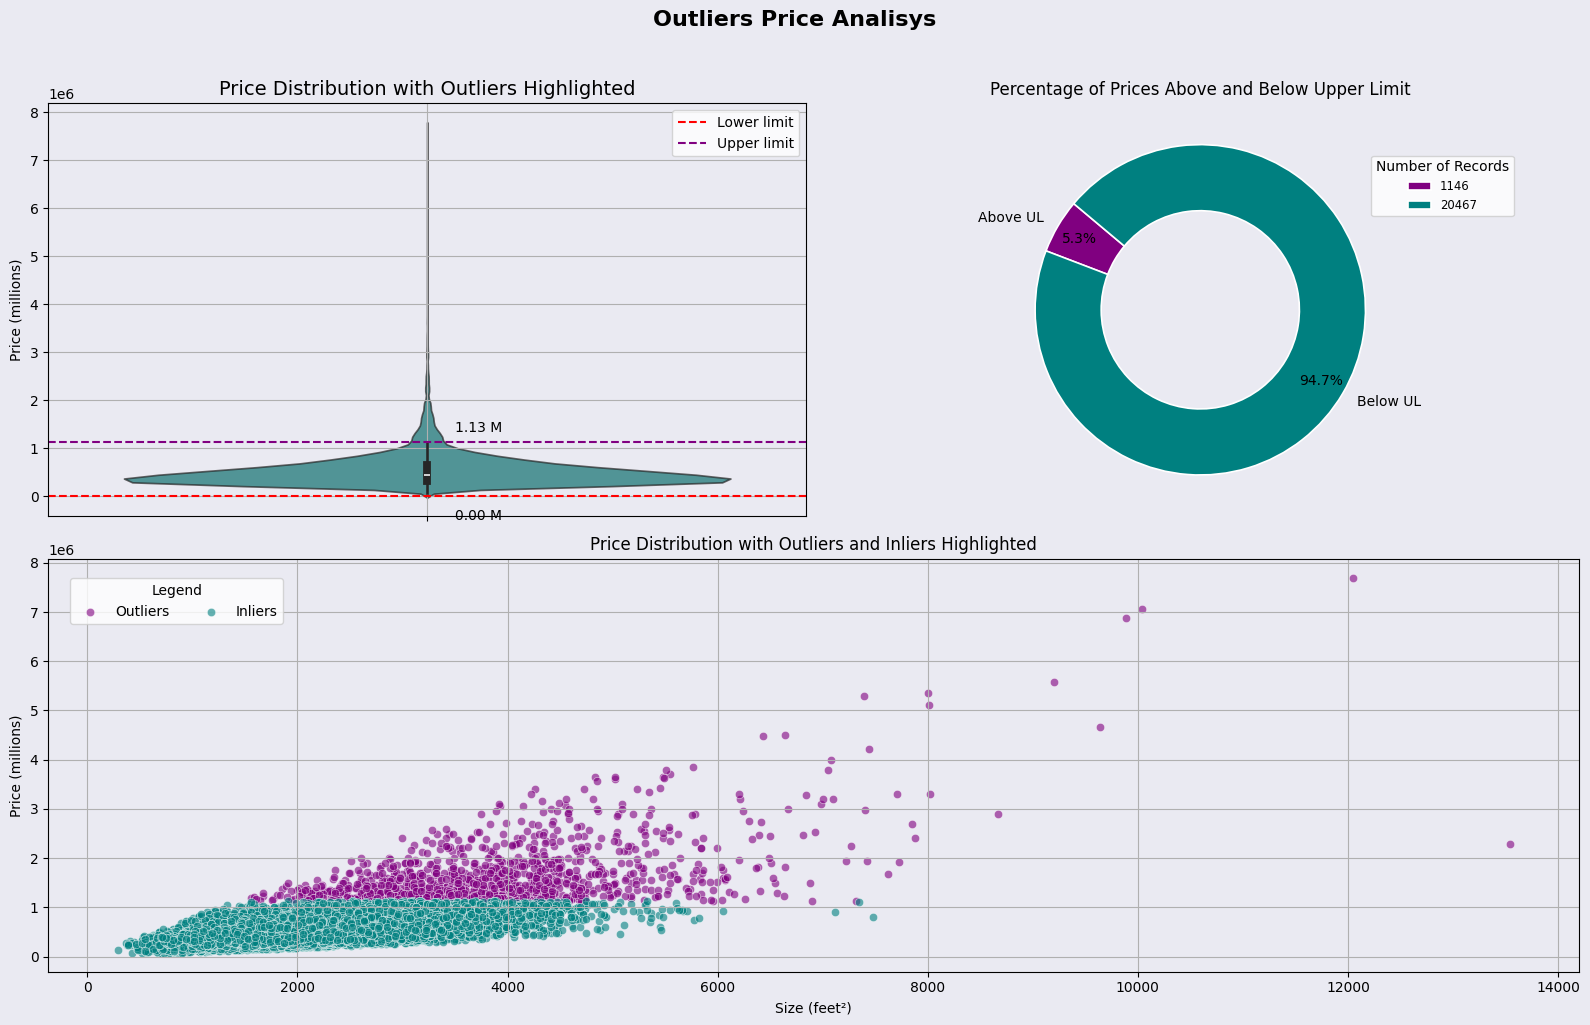

In [17]:

Q1 = np.percentile(house_data['price'], 25)
Q3 = np.percentile(house_data['price'], 75)
IQR = Q3 - Q1
LL = max(0, Q1 - 1.5 * IQR)
UL = Q3 + 1.5 * IQR

above_UL = len(house_data[house_data['price'] > UL])
below_UL = len(house_data[house_data['price'] <= UL])

labels = ['Above UL', 'Below UL']
sizes = [above_UL, below_UL]
colors = ['purple', 'teal']
explode = (0.1, 0)  

plt.figure(figsize=(16, 10), facecolor='#eaeaf2')

plt.suptitle('Outliers Price Analisys', fontsize=16, weight='bold', y=1.02)

# Violin plot
plt.subplot(2, 2, 1)
ax1 = sns.violinplot(data=house_data, y='price', color='teal', alpha=0.7)
ax1.set_title('Price Distribution with Outliers Highlighted', fontsize=14)
ax1.set_ylabel('Price (millions)')
ax1.set_facecolor('#eaeaf2') 
ax1.grid(True)
plt.axhline(y=LL, color='red', linestyle='--', label='Lower limit')
plt.axhline(y=UL, color='purple', linestyle='--', label='Upper limit')
plt.annotate(f'{UL/1000000:.2f} M', xy=(0, UL), xytext=(20, 7),
             textcoords='offset points', color='black', fontsize=10)
plt.annotate(f'{LL/1000000:.2f} M', xy=(0, LL), xytext=(20, -17),
             textcoords='offset points', color='black', fontsize=10)
plt.legend()

# Pie chart
plt.subplot(2, 2, 2)
text_props = {'color': 'black'}
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85,
        wedgeprops=dict(width=0.4, edgecolor='w', linewidth=1.2), textprops=text_props)

plt.title('Percentage of Prices Above and Below Upper Limit', color='black')
plt.tight_layout()
plt.legend(title='Number of Records', labels=[f'{size}' for label, size in zip(labels, sizes)], loc='center left', fontsize='small', bbox_to_anchor=(0.9, 0.8))

# Scatter plot
plt.subplot(2, 1, 2)
ax2 = sns.scatterplot(data=house_data[(house_data['price'] > UL)], x='sqft_living', y='price', color='purple', alpha=0.6, label='Outliers')
sns.scatterplot(data=house_data[(house_data['price'] >= LL) & (house_data['price'] <= UL)], x='sqft_living', y='price', color='teal', alpha=0.6, label='Inliers')
ax2.set_facecolor('#eaeaf2')
plt.title('Price Distribution with Outliers and Inliers Highlighted')
plt.xlabel('Size (feet²)')
plt.ylabel('Price (millions)')
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(0.01, 0.97), ncol=2)
plt.grid(True)

plt.tight_layout()
plt.show()


**No Missing or Incorrect Data Found**

During the data cleaning process, it was observed that there were no missing, null, or incorrect values present in the dataset. The dataset was thoroughly reviewed and all entries were found to be complete and accurate.

This ensures that the data is reliable and ready for analysis, without the need for imputation or correction of missing values.


**Outliers Retained in Data Analysis**

After analysis, it was decided to retain the outliers, as they represent significant and valid values. Exclusion could distort the understanding of the data.

#### Data Type Conversion

In [18]:
transformed_house_data = house_data.copy()

transformed_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
transformed_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [20]:
transformed_house_data['date'] = pd.to_datetime(transformed_house_data['date'], format='%Y%m%dT%H%M%S')

transformed_house_data['sqft_living'] = transformed_house_data['sqft_living'].astype(float)
transformed_house_data['sqft_lot'] = transformed_house_data['sqft_lot'].astype(float)
transformed_house_data['sqft_above'] = transformed_house_data['sqft_above'].astype(float)
transformed_house_data['sqft_basement'] = transformed_house_data['sqft_basement'].astype(float)
transformed_house_data['sqft_living15'] = transformed_house_data['sqft_living15'].astype(float)
transformed_house_data['sqft_lot15'] = transformed_house_data['sqft_lot15'].astype(float)

transformed_house_data['waterfront'] = transformed_house_data['waterfront'].astype(object)

In [21]:
transformed_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  object        
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  float64       
 13  sqft_basement  21613 non-null  float64       
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

**Changes Made in Data Type Conversion**

1. *Date Conversion*
- The 'date' column was converted to datetime format using the format '%Y%m%dT%H%M%S'.

2. *Waterfront Variable*:
- The 'waterfront' column was converted to object.
- This conversion was likely done to preserve the categorical nature of the 'waterfront' variable.

3. *Area Variables*:
- The following columns were converted to float:
  - 'sqft_living'
  - 'sqft_lot'
  - 'sqft_above'
  - 'sqft_basement'
  - 'sqft_living15'
  - 'sqft_lot15'
- This conversion was done to ensure these variables are represented with decimal precision.

These alterations were made to ensure the data is properly formatted for analysis and visualization purposes.


##### Feature Scalling

In [22]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
transformed_house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
original_labels = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
new_labels = ['sqm_living', 'sqm_lot', 'sqm_above', 'sqm_basement', 'sqm_living15', 'sqm_lot15']

label_mapping = dict(zip(original_labels, new_labels))

conversion_factor = 0.092903

transformed_house_data.rename(columns=label_mapping, inplace=True)
columns_to_convert = list(label_mapping.values())
transformed_house_data[columns_to_convert] = transformed_house_data[columns_to_convert] / conversion_factor

In [25]:
transformed_house_data.head()

,id,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,...,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zipcode,lat,long,sqm_living15,sqm_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,12701.419760,60816.120039,1.0,0,0,...,7,12701.419760,0.000000,1955,0,98178,47.5112,-122.257,14423.646169,60816.120039
1,6414100192,2014-12-09,538000.0,3,2.25,27663.261682,77952.272801,2.0,0,0,...,7,23357.695661,4305.566020,1951,1991,98125,47.7210,-122.319,18191.016436,82225.547076
2,5631500400,2015-02-25,180000.0,2,1.00,8288.214589,107639.150512,1.0,0,0,...,6,8288.214589,0.000000,1933,0,98028,47.7379,-122.233,29277.848939,86778.683143
3,2487200875,2014-12-09,604000.0,4,3.00,21097.273500,53819.575256,1.0,0,0,...,7,11302.110804,9795.162697,1965,0,98136,47.5208,-122.393,14638.924470,53819.575256
4,1954400510,2015-02-18,510000.0,3,2.00,18083.377286,86972.433614,1.0,0,0,...,8,18083.377286,0.000000,1987,0,98074,47.6168,-122.045,19375.047092,80761.654629


In [26]:
transformed_house_data.to_csv("../data/interim/1.0_transformed_kc_house_sales.csv", index=False)

**Changes Made in Data Type Conversion**

1. *Date Conversion*
- The 'date' column was converted to datetime format using the format '%Y%m%dT%H%M%S'.

2. *Waterfront Variable*:
- The 'waterfront' column was converted to object.
- This conversion was likely done to preserve the categorical nature of the 'waterfront' variable.

3. *Area Variables*:
- The following columns were converted to float:
  - 'sqft_living'
  - 'sqft_lot'
  - 'sqft_above'
  - 'sqft_basement'
  - 'sqft_living15'
  - 'sqft_lot15'
- This conversion was done to ensure these variables are represented with decimal precision.

These alterations were made to ensure the data is properly formatted for analysis and visualization purposes.

**Feature Rescaling**

The following variables have been converted from square feet to square meters:

- 'sqft_living'
- 'sqft_lot'
- 'sqft_above'
- 'sqft_basement'
- 'sqft_living15'
- 'sqft_lot15'

This conversion was done to standardize the unit of measurement across the dataset to square meters, a commonly used unit in real estate analysis.
It provides a more intuitive understanding of the living space, lot size, and other area-related features.

#### Feature Engineering

In [27]:
transformed_house_data = pd.read_csv("../data/interim/1.0_transformed_kc_house_sales.csv")

transformed_house_data2 = transformed_house_data.copy()
transformed_house_data2.head()

,id,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,...,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zipcode,lat,long,sqm_living15,sqm_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,12701.419760,60816.120039,1.0,0,0,...,7,12701.419760,0.000000,1955,0,98178,47.5112,-122.257,14423.646169,60816.120039
1,6414100192,2014-12-09,538000.0,3,2.25,27663.261682,77952.272801,2.0,0,0,...,7,23357.695661,4305.566020,1951,1991,98125,47.7210,-122.319,18191.016436,82225.547076
2,5631500400,2015-02-25,180000.0,2,1.00,8288.214589,107639.150512,1.0,0,0,...,6,8288.214589,0.000000,1933,0,98028,47.7379,-122.233,29277.848939,86778.683143
3,2487200875,2014-12-09,604000.0,4,3.00,21097.273500,53819.575256,1.0,0,0,...,7,11302.110804,9795.162697,1965,0,98136,47.5208,-122.393,14638.924470,53819.575256
4,1954400510,2015-02-18,510000.0,3,2.00,18083.377286,86972.433614,1.0,0,0,...,8,18083.377286,0.000000,1987,0,98074,47.6168,-122.045,19375.047092,80761.654629


In [28]:
transformed_house_data2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqm_above',
       'sqm_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqm_living15', 'sqm_lot15'],
      dtype='object')

In [29]:
transformed_house_data2[['sqm_living', 'sqm_lot', 'sqm_above','sqm_basement']].head(1)

,sqm_living,sqm_lot,sqm_above,sqm_basement
0,12701.41976,60816.120039,12701.41976,0.0


In [30]:
current_year = dt.datetime.now().year

transformed_house_data2['sqm_outdoor'] = transformed_house_data2['sqm_lot'] - transformed_house_data2['sqm_living']
transformed_house_data2['lot_living_ratio'] = transformed_house_data2['sqm_lot'] / transformed_house_data2['sqm_living']
transformed_house_data2['sqm_outdoor15'] = transformed_house_data2['sqm_lot15'] - transformed_house_data2['sqm_living15']
transformed_house_data2['lot_living_ratio15'] = transformed_house_data2['sqm_lot15'] / transformed_house_data2['sqm_living15']

transformed_house_data2['age_of_house'] = current_year - transformed_house_data2['yr_built']
transformed_house_data2['renovated'] = (transformed_house_data2['yr_renovated'] != 0).astype(int)
transformed_house_data2['renovation_age'] = current_year - transformed_house_data2['yr_renovated'].apply(lambda x: x if x > 0 else current_year)

In [31]:
transformed_house_data2.head()

,id,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,...,long,sqm_living15,sqm_lot15,sqm_outdoor,lot_living_ratio,sqm_outdoor15,lot_living_ratio15,age_of_house,renovated,renovation_age
0,7129300520,2014-10-13,221900.0,3,1.00,12701.419760,60816.120039,1.0,0,0,...,-122.257,14423.646169,60816.120039,48114.700279,4.788136,46392.473871,4.216418,69,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,27663.261682,77952.272801,2.0,0,0,...,-122.319,18191.016436,82225.547076,50289.011119,2.817899,64034.530639,4.520118,73,1,33
2,5631500400,2015-02-25,180000.0,2,1.00,8288.214589,107639.150512,1.0,0,0,...,-122.233,29277.848939,86778.683143,99350.935922,12.987013,57500.834203,2.963971,91,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,21097.273500,53819.575256,1.0,0,0,...,-122.393,14638.924470,53819.575256,32722.301756,2.551020,39180.650786,3.676471,59,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,18083.377286,86972.433614,1.0,0,0,...,-122.045,19375.047092,80761.654629,68889.056328,4.809524,61386.607537,4.168333,37,0,0


# algumas casas possuêm ano de renovação faltando